###  <p style="font-family: Arial; font-size:1em;color:#8D38C9;"> STEP 1: mp3 to wav </p>

In [76]:
import os
from pydub import AudioSegment

In [16]:
path_to_mp3_files = ''
#Change working directory
os.chdir(path_to_mp3_files)

In [17]:
mp3_files = os.listdir()

for file in mp3_files:
    #spliting the file into the name and the extension
    name, ext = os.path.splitext(file)
    if ext == ".mp3":
       mp3_sound = AudioSegment.from_mp3(file)
       #rename them using the old name + ".wav"
       mp3_sound.export("{0}.wav".format(name), format="wav")
    
print('Conversation Complete')

Conversation Complete


### <p style="font-family: Arial; font-size:1em;color:#F75D59;"> STEP 2: Extract features from Librosa </p>

In [34]:
import librosa
import glob
import numpy as np
import pandas as pd
import csv
import ntpath

In [7]:
header = 'song_name duration tempo chroma_sqt spectral_centroid rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header = header.split()
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [9]:
wav_files = glob.glob("*.wav")
for song in wav_files:
    song_name = ntpath.basename(song).replace(' ', '_')
    song_name = song_name.replace(',', '_')
    song_name = song_name.replace('.wav', '')
    y, sr = librosa.load(song)
    duration = librosa.get_duration(y=y, sr=sr)
    y_harmonic, y_percussive = librosa.effects.hpss(y)
    tempo, beat_frames = librosa.beat.beat_track(y=y_percussive, sr=sr)
    chromagram = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    
    to_append = f'{song_name} {duration} {tempo} {np.mean(chromagram)} {np.mean(spec_cent)} {np.mean(rolloff)} {np.mean(zcr)}'
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    file = open('data.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [35]:
data = pd.read_csv('data.csv', sep = ',')
data

,song_name,duration,tempo,chroma_sqt,spectral_centroid,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,Аркона_Сва,391.013333,135.999178,0.449870,2685.436004,5678.307582,0.123003,-4.365860,75.313835,-2.566111,...,1.414979,5.333061,-2.237024,-0.702839,-6.073435,3.472966,-5.916136,1.708488,-2.358503,3.727285
1,Макс_Корж_-_Оптимист,200.725986,107.666016,0.397586,2201.484865,4716.649501,0.090569,-69.859642,92.385139,-1.880520,...,-2.457745,-0.266681,1.966181,-2.449119,-9.653233,-0.755416,-12.548205,5.469534,-4.627914,-3.848405
2,Between_the_Buried_and_Me_-_Blot,627.330884,143.554688,0.454949,2478.192190,5319.290571,0.105323,-11.728739,83.950714,-6.042708,...,-1.978588,4.423817,-2.828503,2.171834,-4.100192,2.993298,-6.180595,0.924561,-5.008716,-1.243854
3,05._Black_Magic_(Make_It_Better),153.888435,89.102909,0.397452,2300.233452,4942.688821,0.088846,-84.885735,90.900841,5.949732,...,-3.822762,3.896519,-2.074863,6.543289,0.788870,6.847250,-1.110289,6.674957,-0.483831,1.755192
4,Heavydirtysoul___Twenty_One_Pilots,234.813333,129.199219,0.432680,2874.844137,5942.136695,0.139309,-43.674690,71.813156,-4.692971,...,-5.188655,3.482470,-2.523619,-0.688565,-5.574951,-0.954529,-3.459168,3.881291,-3.272092,3.092876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,In_Flames_Colony,279.426667,103.359375,0.540980,2744.012948,5687.781598,0.123566,9.450967,68.431847,-15.645384,...,-4.053427,6.060515,-5.077599,-1.727093,-6.631519,1.590326,-6.395686,-2.588398,-4.849587,-3.019773
82,Aloe_Blacc_-_I_Need_A_Dollar,243.414785,95.703125,0.430760,1977.425223,4238.755785,0.081416,-157.946228,98.082062,-3.021717,...,-3.786082,3.063868,7.442361,0.597320,-0.897655,4.796501,-7.382820,4.933862,-2.236449,-0.821952
83,Не_молчи._Гришковец,209.684898,151.999081,0.427207,2025.486180,4303.893836,0.085361,-67.017937,109.598900,-3.067187,...,-8.414015,-2.357708,-3.227099,-1.177592,-3.042321,5.699632,-4.894035,0.461399,-2.055482,-0.057711
84,Зеленые_глаза._Гришковец,209.684898,103.359375,0.422780,2076.164676,4588.830260,0.081821,-56.024387,101.991943,11.754837,...,-7.302107,-0.641078,-8.737723,-1.961487,-4.699355,1.196856,-5.750229,2.900234,-3.634031,-1.238999


Features description:

1) song_name – track name

2) duration - track duration (in seconds)

3) tempo - track beats, the number of timestamps (in sec) corresponding to detected beat events

4) chroma_sqt - constant-Q chromagram - chromagram of the frequency, that we get by constant-Q transform (the Fourier transform)

5) spectral_centroid - the spectral centroid for each frame in a signal (each frame of a magnitude spectrogram is normalized and treated as a distribution over frequency bins, from which the mean (centroid) is extracted per frame)

6) rolloff - the frequency below which a specified percentage of the total spectral energy (0.85 by default) lies
7) zero_crossing_rate - the rate at which the signal changes from positive to negative or back

8-27) mfcc_i (i = 1,…20) - mel-frequency cepstral coefficients (MFCCs), the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency

###  <p style="font-family: Arial; font-size:1em;color:#F778A1;"> STEP 3: Clustering </p>

In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

%matplotlib inline

#### Feature Distribution

In [8]:
audio_cols = ['duration', 'tempo', 'chroma_sqt', 'spectral_centroid', 'rolloff' , 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']
X_prenorm = data[audio_cols]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000251F2B04128>,
      dtype=object)

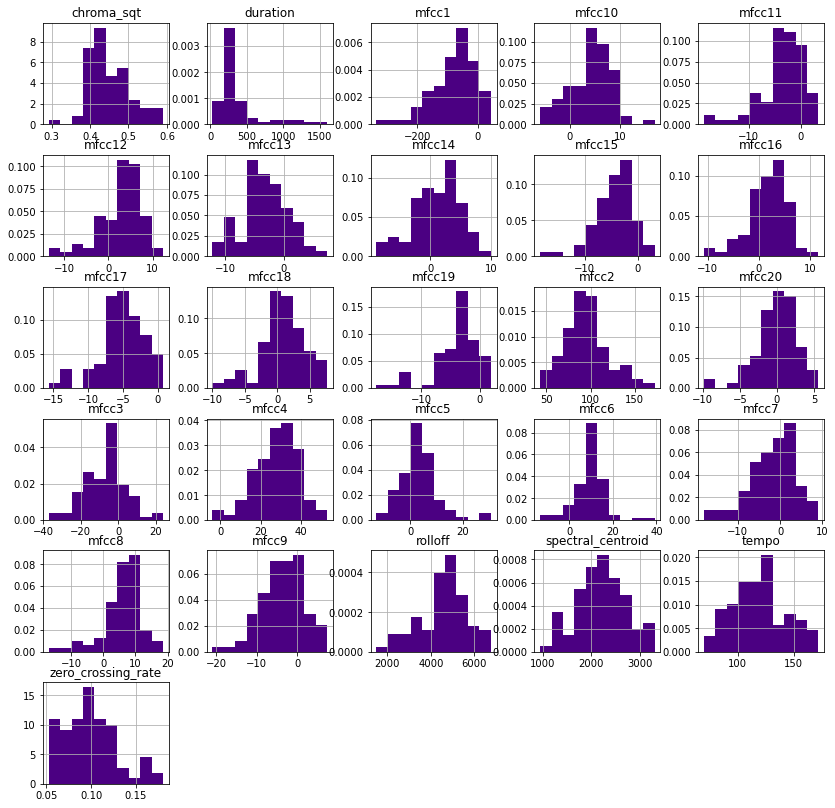

In [6]:
pd.DataFrame(X_prenorm,columns=audio_cols).hist(figsize=(14,14), density=True, color = 'indigo')

### Clastering by tensorflow

In [3]:
import tensorflow as tf

#### Hyper-parameters

In [5]:
# Number of cluster we wish to divide the data into( user tunable )
k = 5

# Max number of allowed iterations for the algorithm( user tunable )
epochs = 2000

#### K-means utility functions

In [6]:
def initilizeCentroids( data, k ):
    '''
    Initilize cluster centroids( assuming random k data points to be centroid return them )
    '''
    centroids = data.values[ 0 : k ]
    return centroids

In [7]:
# utility to assign centroids to data points
def assignCentroids(X, C):  
    expanded_vectors = tf.expand_dims(X, 0)
    expanded_centroids = tf.expand_dims(C, 1)
    distance = tf.math.reduce_sum( tf.math.square( tf.math.subtract( expanded_vectors, expanded_centroids ) ), axis=2 )
    return tf.math.argmin(distance, 0)
                                              
# utility to recalculate centroids
def reCalculateCentroids(X, X_labels):
    sums = tf.math.unsorted_segment_sum( X, X_labels, k )
    counts = tf.math.unsorted_segment_sum( tf.ones_like( X ), X_labels, k  )
    return tf.math.divide( sums, counts )           

#### Driver function

In [129]:
fileList = list(data['song_name'])
fileList

['Аркона_Сва',
 'Макс_Корж_-_Оптимист',
 'Between_the_Buried_and_Me_-_Blot',
 '05._Black_Magic_(Make_It_Better)',
 'Heavydirtysoul___Twenty_One_Pilots',
 'Apocalyptica____Metallica',
 'elton-dzhon-blue-sorry-seems-to-be-the-hardest-word-slovo-prosti-samoe-slozhnoe-slovo-na-svete..._(Cool.DJ)',
 'Wardruna_Tyr',
 'Robin_Schulz_-_Sugar_(feat._Francesco_Yates)',
 'Caliban_This_Oath',
 'Between_the_Buried_and_Me_-_Swim_To_The_Moon',
 'Wardruna_IngwaR',
 'Скованные_одной_цепью',
 'Alle_Farben_-_Bad_Ideas',
 'Chlorine___twenty_one_pilots',
 'Аркона_Зов_битвы',
 'Haken_-_The_Architect',
 'Небо_выпил___Фёдоров__Волков',
 'Cypecore_Torn_Apart',
 'Wardruna_Solringen',
 'Haken_-_Crystallised',
 '2pac_–_Only_God_Can_Judge_Me',
 'All_Nightmare_Long___Metallica',
 '__2013)',
 'Аркона_Гнев_времён',
 'Twenty_One_Pilots_тАУ_Message_Man',
 'Cypecore_Innocent',
 '_2019)___Will_Smith',
 'The_Cars_-_Heartbeat_City',
 'Between_the_Buried_and_Me_-_Silent_Flight_Parliament',
 '01_Charlemagne',
 'Arabian_Nights

In [7]:
data.drop('song_name', axis = 1, inplace = True)

In [8]:
data

,duration,tempo,chroma_sqt,spectral_centroid,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,391.013333,135.999178,0.449870,2685.436004,5678.307582,0.123003,-4.365860,75.313835,-2.566111,34.477596,...,1.414979,5.333061,-2.237024,-0.702839,-6.073435,3.472966,-5.916136,1.708488,-2.358503,3.727285
1,200.725986,107.666016,0.397586,2201.484865,4716.649501,0.090569,-69.859642,92.385139,-1.880520,10.260041,...,-2.457745,-0.266681,1.966181,-2.449119,-9.653233,-0.755416,-12.548205,5.469534,-4.627914,-3.848405
2,627.330884,143.554688,0.454949,2478.192190,5319.290571,0.105323,-11.728739,83.950714,-6.042708,28.742422,...,-1.978588,4.423817,-2.828503,2.171834,-4.100192,2.993298,-6.180595,0.924561,-5.008716,-1.243854
3,153.888435,89.102909,0.397452,2300.233452,4942.688821,0.088846,-84.885735,90.900841,5.949732,17.314032,...,-3.822762,3.896519,-2.074863,6.543289,0.788870,6.847250,-1.110289,6.674957,-0.483831,1.755192
4,234.813333,129.199219,0.432680,2874.844137,5942.136695,0.139309,-43.674690,71.813156,-4.692971,18.830206,...,-5.188655,3.482470,-2.523619,-0.688565,-5.574951,-0.954529,-3.459168,3.881291,-3.272092,3.092876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,279.426667,103.359375,0.540980,2744.012948,5687.781598,0.123566,9.450967,68.431847,-15.645384,31.449589,...,-4.053427,6.060515,-5.077599,-1.727093,-6.631519,1.590326,-6.395686,-2.588398,-4.849587,-3.019773
82,243.414785,95.703125,0.430760,1977.425223,4238.755785,0.081416,-157.946228,98.082062,-3.021717,38.205135,...,-3.786082,3.063868,7.442361,0.597320,-0.897655,4.796501,-7.382820,4.933862,-2.236449,-0.821952
83,209.684898,151.999081,0.427207,2025.486180,4303.893836,0.085361,-67.017937,109.598900,-3.067187,23.713324,...,-8.414015,-2.357708,-3.227099,-1.177592,-3.042321,5.699632,-4.894035,0.461399,-2.055482,-0.057711
84,209.684898,103.359375,0.422780,2076.164676,4588.830260,0.081821,-56.024387,101.991943,11.754837,28.560455,...,-7.302107,-0.641078,-8.737723,-1.961487,-4.699355,1.196856,-5.750229,2.900234,-3.634031,-1.238999


In [10]:
data.astype('float32').dtypes

duration              float32
tempo                 float32
chroma_sqt            float32
spectral_centroid     float32
rolloff               float32
zero_crossing_rate    float32
mfcc1                 float32
mfcc2                 float32
mfcc3                 float32
mfcc4                 float32
mfcc5                 float32
mfcc6                 float32
mfcc7                 float32
mfcc8                 float32
mfcc9                 float32
mfcc10                float32
mfcc11                float32
mfcc12                float32
mfcc13                float32
mfcc14                float32
mfcc15                float32
mfcc16                float32
mfcc17                float32
mfcc18                float32
mfcc19                float32
mfcc20                float32
dtype: object

In [12]:
#Change dtype - just in case
X = tf.placeholder( dtype = tf.float32 )
C = tf.placeholder( dtype = tf.float32 )
C_labels = tf.placeholder( dtype = tf.int32 )

In [13]:
expanded_vectors = tf.expand_dims( X, 0 ) # We add another dimension to X at index 0. 
expanded_centroids = tf.expand_dims( C, 1 ) #We add another dimenstion to C at index 1. 
distance = tf.reduce_sum( tf.square( tf.subtract( expanded_vectors, expanded_centroids ) ), axis = 2 ) #additional dimentions -  This is to make use of broadcasting
getCentroidsOp = tf.argmin( distance, 0 )

In [14]:
sums = tf.unsorted_segment_sum( X, C_labels, k ) #add up the feature vectors of the data points with same label id
counts = tf.unsorted_segment_sum( tf.ones_like( X ), C_labels, k  ) #give the new centroids
reCalculateCentroidsOp = tf.divide( sums,  counts ) #Dividing the two tensors to generate the new centroids

In [15]:
data_labels = [] 
centroids = [] 
with tf.Session() as sess:
    
    sess.run( tf.global_variables_initializer() )
    
    centroids = initilizeCentroids( data, k ) 
    
    
    
    for epoch in range( epochs ):
        data_labels =  sess.run( getCentroidsOp, feed_dict = { X: data, C: centroids } )  #assign the centroids to the data points
        centroids = sess.run( reCalculateCentroidsOp, feed_dict = { X: data, C_labels: data_labels } )  #Recalculate the centroids
    
print( data_labels )
print( centroids )

[0 3 0 0 4 1 3 1 0 0 2 1 3 0 1 0 2 1 0 1 2 4 4 1 4 3 0 0 0 2 0 3 3 0 0 4 0
 0 0 1 3 0 3 1 3 1 0 1 0 1 3 0 2 3 3 2 1 2 3 2 3 3 3 4 3 4 0 1 0 4 3 4 0 1
 0 1 3 1 4 3 0 0 3 3 3 3]
[[ 2.77180084e+02  1.13179504e+02  4.75483567e-01  2.50901611e+03
   5.25166797e+03  1.12194270e-01 -3.20768471e+01  8.12688599e+01
  -7.22105312e+00  2.89583759e+01  2.76120567e+00  1.17672186e+01
  -7.84962058e-01  7.75958347e+00 -1.55945420e+00  4.78089285e+00
  -2.78602099e+00  4.30571413e+00 -2.83461785e+00  2.22235656e+00
  -4.12355995e+00  2.21329403e+00 -5.03614616e+00  1.75610578e+00
  -3.21473551e+00  2.24364147e-01]
 [ 3.29387238e+02  1.29255493e+02  4.29151326e-01  1.46258057e+03
   2.90605566e+03  6.64767623e-02 -1.48354858e+02  1.33040878e+02
  -1.21179762e+01  2.34858532e+01  2.98244524e+00  3.50392628e+00
  -3.24630928e+00  1.60880655e-01 -5.80440426e+00  3.16588640e+00
  -5.10640860e+00  1.71662903e+00 -4.52312899e+00  2.52964526e-01
  -4.96409321e+00 -5.40471636e-02 -5.30511808e+00 -6.73177719e-

In [16]:
final_labels_tf = pd.DataFrame( { "Labels": data_labels, "File Names": fileList } )
final_labels_tf

,Labels,File Names
0,0,Аркона_Сва
1,3,Макс_Корж_-_Оптимист
2,0,Between_the_Buried_and_Me_-_Blot
3,0,05._Black_Magic_(Make_It_Better)
4,4,Heavydirtysoul___Twenty_One_Pilots
...,...,...
81,0,In_Flames_Colony
82,3,Aloe_Blacc_-_I_Need_A_Dollar
83,3,Не_молчи._Гришковец
84,3,Зеленые_глаза._Гришковец


### Clastering by sklearn + silhouette metrics

In [97]:
from sklearn.cluster import Birch, KMeans

Clastering methods comparing and optimap n detectering

In [98]:
X = pd.DataFrame(X_prenorm,columns=audio_cols)
X

,duration,tempo,chroma_sqt,spectral_centroid,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,391.013333,135.999178,0.449870,2685.436004,5678.307582,0.123003,-4.365860,75.313835,-2.566111,34.477596,...,1.414979,5.333061,-2.237024,-0.702839,-6.073435,3.472966,-5.916136,1.708488,-2.358503,3.727285
1,200.725986,107.666016,0.397586,2201.484865,4716.649501,0.090569,-69.859642,92.385139,-1.880520,10.260041,...,-2.457745,-0.266681,1.966181,-2.449119,-9.653233,-0.755416,-12.548205,5.469534,-4.627914,-3.848405
2,627.330884,143.554688,0.454949,2478.192190,5319.290571,0.105323,-11.728739,83.950714,-6.042708,28.742422,...,-1.978588,4.423817,-2.828503,2.171834,-4.100192,2.993298,-6.180595,0.924561,-5.008716,-1.243854
3,153.888435,89.102909,0.397452,2300.233452,4942.688821,0.088846,-84.885735,90.900841,5.949732,17.314032,...,-3.822762,3.896519,-2.074863,6.543289,0.788870,6.847250,-1.110289,6.674957,-0.483831,1.755192
4,234.813333,129.199219,0.432680,2874.844137,5942.136695,0.139309,-43.674690,71.813156,-4.692971,18.830206,...,-5.188655,3.482470,-2.523619,-0.688565,-5.574951,-0.954529,-3.459168,3.881291,-3.272092,3.092876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,279.426667,103.359375,0.540980,2744.012948,5687.781598,0.123566,9.450967,68.431847,-15.645384,31.449589,...,-4.053427,6.060515,-5.077599,-1.727093,-6.631519,1.590326,-6.395686,-2.588398,-4.849587,-3.019773
82,243.414785,95.703125,0.430760,1977.425223,4238.755785,0.081416,-157.946228,98.082062,-3.021717,38.205135,...,-3.786082,3.063868,7.442361,0.597320,-0.897655,4.796501,-7.382820,4.933862,-2.236449,-0.821952
83,209.684898,151.999081,0.427207,2025.486180,4303.893836,0.085361,-67.017937,109.598900,-3.067187,23.713324,...,-8.414015,-2.357708,-3.227099,-1.177592,-3.042321,5.699632,-4.894035,0.461399,-2.055482,-0.057711
84,209.684898,103.359375,0.422780,2076.164676,4588.830260,0.081821,-56.024387,101.991943,11.754837,28.560455,...,-7.302107,-0.641078,-8.737723,-1.961487,-4.699355,1.196856,-5.750229,2.900234,-3.634031,-1.238999


In [39]:
our_score = pd.DataFrame()

In [40]:
N = range(2, 21) 
for n in N:
    brc = Birch(n_clusters=n) # Birch clastering method
    brc.fit(X)
    brc_clast = brc.predict(X) #brc_clast
    birch_score = silhouette_score(X, brc_clast)
       
    temp_score_data = pd.DataFrame({'n' : [n], 'birch_score' : [birch_score]})
    our_score = our_score.append(temp_score_data)

In [41]:
N = range(2, 21)
score = []
for n in N:
    kmn = KMeans(n_clusters=n, max_iter = 2000) # K-means clastering method
    kmn.fit(X)
    kmean_clast = kmn.predict(X)
    kmean_score = silhouette_score(X, kmean_clast)
    score.append(kmean_score)
   
our_score['kmean_score'] = score

In [42]:
our_score

,n,birch_score,kmean_score
0,2,0.528636,0.495722
0,3,0.380808,0.468232
0,4,0.379236,0.440506
0,5,0.392717,0.460786
0,6,0.451364,0.455154
0,7,0.431435,0.457134
0,8,0.423026,0.448726
0,9,0.437500,0.402395
0,10,0.437159,0.406734
0,11,0.400705,0.390065


According to Birch method opt. n = 2, but for our purpose n = 6 is better

According to KMean method opt. n = 2, but for our purpose we should check n = 2, 3, 5

## Birch, n = 6:

In [138]:
brc = Birch(n_clusters=6) # Birch clastering method
brc.fit(X)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=6,
      threshold=0.5)

In [139]:
silhouette_score(X, brc_clast) # checking

0.45136395372621135

In [140]:
brc_clast = brc.predict(X) + 1 # clasters detection
brc_clast

array([1, 4, 1, 1, 2, 3, 4, 3, 1, 1, 6, 5, 4, 1, 5, 1, 6, 5, 1, 5, 6, 2,
       2, 5, 2, 4, 1, 1, 1, 6, 1, 5, 4, 1, 1, 2, 1, 1, 1, 5, 5, 1, 4, 3,
       4, 3, 1, 3, 1, 5, 4, 1, 6, 4, 5, 6, 3, 6, 4, 6, 4, 4, 4, 2, 4, 2,
       1, 5, 1, 2, 4, 2, 1, 3, 1, 3, 4, 3, 2, 5, 1, 1, 4, 4, 4, 5],
      dtype=int64)

In [141]:
labels_birch = pd.DataFrame(data['song_name'])
labels_birch['birch_class'] = brc_clast
labels_birch.head(10)

,song_name,birch_class
0,Аркона_Сва,1
1,Макс_Корж_-_Оптимист,4
2,Between_the_Buried_and_Me_-_Blot,1
3,05._Black_Magic_(Make_It_Better),1
4,Heavydirtysoul___Twenty_One_Pilots,2
5,Apocalyptica____Metallica,3
6,elton-dzhon-blue-sorry-seems-to-be-the-hardest...,4
7,Wardruna_Tyr,3
8,Robin_Schulz_-_Sugar_(feat._Francesco_Yates),1
9,Caliban_This_Oath,1


In [142]:
labels_birch.groupby('birch_class').count()

,song_name
birch_class,
1,27
2,10
3,9
4,19
5,13
6,8


In [143]:
first_class = labels_birch.loc[labels_birch.birch_class == 1] #[labels_birch.song_name]
first_class

,song_name,birch_class
0,Аркона_Сва,1
2,Between_the_Buried_and_Me_-_Blot,1
3,05._Black_Magic_(Make_It_Better),1
8,Robin_Schulz_-_Sugar_(feat._Francesco_Yates),1
9,Caliban_This_Oath,1
13,Alle_Farben_-_Bad_Ideas,1
15,Аркона_Зов_битвы,1
18,Cypecore_Torn_Apart,1
26,Cypecore_Innocent,1
27,_2019)___Will_Smith,1


## KMean, n = 2, 3, 5

In [144]:
kmean = KMeans(n_clusters=2, max_iter = 2000)
kmean.fit(X)
kmean_clast_2 = kmean.predict(X) + 1
kmean_clast_2

array([1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2])

In [145]:
silhouette_score(X, kmean_clast_2) # checking

0.4957218641364818

In [146]:
kmean = KMeans(n_clusters=3, max_iter = 2000)
kmean.fit(X)
kmean_clast_3 = kmean.predict(X) + 1
kmean_clast_3

array([1, 2, 1, 2, 1, 3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 1, 2, 3, 1, 3, 2, 1,
       1, 3, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 3, 2, 2, 2, 3,
       2, 3, 1, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 3, 1, 1, 2, 1, 2, 3, 1, 3, 2, 3, 1, 3, 2, 1, 2, 2, 2, 2])

In [147]:
silhouette_score(X, kmean_clast_3) # checking

0.46823160395538227

In [148]:
kmean = KMeans(n_clusters=5, max_iter = 2000)
kmean.fit(X)
kmean_clast_5 = kmean.predict(X) + 1
kmean_clast_5

array([3, 1, 1, 1, 3, 2, 1, 2, 1, 1, 4, 5, 5, 1, 5, 3, 4, 5, 3, 5, 4, 3,
       3, 5, 3, 1, 1, 3, 3, 4, 1, 5, 5, 1, 1, 3, 1, 3, 3, 2, 5, 1, 1, 2,
       1, 2, 1, 2, 3, 5, 1, 1, 4, 5, 5, 4, 2, 4, 5, 4, 1, 5, 5, 3, 1, 3,
       1, 5, 3, 3, 5, 3, 1, 2, 1, 2, 1, 2, 3, 5, 1, 3, 5, 5, 1, 5])

In [149]:
silhouette_score(X, kmean_clast_5) # checking

0.46057845234746614

In [150]:
labels_kmean = pd.DataFrame(data['song_name'])
labels_kmean['kmean_clast_2'] = kmean_clast_2
labels_kmean['kmean_clast_3'] = kmean_clast_3
labels_kmean['kmean_clast_5'] = kmean_clast_5
labels_kmean.head(10)

,song_name,kmean_clast_2,kmean_clast_3,kmean_clast_5
0,Аркона_Сва,1,1,3
1,Макс_Корж_-_Оптимист,1,2,1
2,Between_the_Buried_and_Me_-_Blot,1,1,1
3,05._Black_Magic_(Make_It_Better),1,2,1
4,Heavydirtysoul___Twenty_One_Pilots,1,1,3
5,Apocalyptica____Metallica,2,3,2
6,elton-dzhon-blue-sorry-seems-to-be-the-hardest...,1,2,1
7,Wardruna_Tyr,2,3,2
8,Robin_Schulz_-_Sugar_(feat._Francesco_Yates),1,2,1
9,Caliban_This_Oath,1,2,1


In [151]:
labels_kmean.groupby('kmean_clast_2').aggregate({'song_name' : 'count' })

,song_name
kmean_clast_2,
1,55
2,31


In [152]:
labels_kmean.groupby('kmean_clast_3').aggregate({'song_name' : 'count' })

,song_name
kmean_clast_3,
1,23
2,45
3,18


In [153]:
labels_kmean.groupby('kmean_clast_5').aggregate({'song_name' : 'count' })

,song_name
kmean_clast_5,
1,27
2,10
3,20
4,8
5,21


###  <p style="font-family: Arial; font-size:1em;color:#306754;"> STEP 4: PCA and visualization </p>

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [45]:
df = pd.concat([data, final_labels_tf], axis=1, sort=False)

NameError: name 'final_labels_tf' is not defined

In [78]:
df

,duration,tempo,chroma_sqt,spectral_centroid,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,Labels,File Names
0,391.013333,135.999178,0.449870,2685.436004,5678.307582,0.123003,-4.365860,75.313835,-2.566111,34.477596,...,-2.237024,-0.702839,-6.073435,3.472966,-5.916136,1.708488,-2.358503,3.727285,0,Аркона_Сва
1,200.725986,107.666016,0.397586,2201.484865,4716.649501,0.090569,-69.859642,92.385139,-1.880520,10.260041,...,1.966181,-2.449119,-9.653233,-0.755416,-12.548205,5.469534,-4.627914,-3.848405,3,Макс_Корж_-_Оптимист
2,627.330884,143.554688,0.454949,2478.192190,5319.290571,0.105323,-11.728739,83.950714,-6.042708,28.742422,...,-2.828503,2.171834,-4.100192,2.993298,-6.180595,0.924561,-5.008716,-1.243854,0,Between_the_Buried_and_Me_-_Blot
3,153.888435,89.102909,0.397452,2300.233452,4942.688821,0.088846,-84.885735,90.900841,5.949732,17.314032,...,-2.074863,6.543289,0.788870,6.847250,-1.110289,6.674957,-0.483831,1.755192,0,05._Black_Magic_(Make_It_Better)
4,234.813333,129.199219,0.432680,2874.844137,5942.136695,0.139309,-43.674690,71.813156,-4.692971,18.830206,...,-2.523619,-0.688565,-5.574951,-0.954529,-3.459168,3.881291,-3.272092,3.092876,4,Heavydirtysoul___Twenty_One_Pilots
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,279.426667,103.359375,0.540980,2744.012948,5687.781598,0.123566,9.450967,68.431847,-15.645384,31.449589,...,-5.077599,-1.727093,-6.631519,1.590326,-6.395686,-2.588398,-4.849587,-3.019773,0,In_Flames_Colony
82,243.414785,95.703125,0.430760,1977.425223,4238.755785,0.081416,-157.946228,98.082062,-3.021717,38.205135,...,7.442361,0.597320,-0.897655,4.796501,-7.382820,4.933862,-2.236449,-0.821952,3,Aloe_Blacc_-_I_Need_A_Dollar
83,209.684898,151.999081,0.427207,2025.486180,4303.893836,0.085361,-67.017937,109.598900,-3.067187,23.713324,...,-3.227099,-1.177592,-3.042321,5.699632,-4.894035,0.461399,-2.055482,-0.057711,3,Не_молчи._Гришковец
84,209.684898,103.359375,0.422780,2076.164676,4588.830260,0.081821,-56.024387,101.991943,11.754837,28.560455,...,-8.737723,-1.961487,-4.699355,1.196856,-5.750229,2.900234,-3.634031,-1.238999,3,Зеленые_глаза._Гришковец


In [21]:
df = df.drop('File Names', axis = 1)
df

,duration,tempo,chroma_sqt,spectral_centroid,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,Labels
0,391.013333,135.999178,0.449870,2685.436004,5678.307582,0.123003,-4.365860,75.313835,-2.566111,34.477596,...,5.333061,-2.237024,-0.702839,-6.073435,3.472966,-5.916136,1.708488,-2.358503,3.727285,0
1,200.725986,107.666016,0.397586,2201.484865,4716.649501,0.090569,-69.859642,92.385139,-1.880520,10.260041,...,-0.266681,1.966181,-2.449119,-9.653233,-0.755416,-12.548205,5.469534,-4.627914,-3.848405,3
2,627.330884,143.554688,0.454949,2478.192190,5319.290571,0.105323,-11.728739,83.950714,-6.042708,28.742422,...,4.423817,-2.828503,2.171834,-4.100192,2.993298,-6.180595,0.924561,-5.008716,-1.243854,0
3,153.888435,89.102909,0.397452,2300.233452,4942.688821,0.088846,-84.885735,90.900841,5.949732,17.314032,...,3.896519,-2.074863,6.543289,0.788870,6.847250,-1.110289,6.674957,-0.483831,1.755192,0
4,234.813333,129.199219,0.432680,2874.844137,5942.136695,0.139309,-43.674690,71.813156,-4.692971,18.830206,...,3.482470,-2.523619,-0.688565,-5.574951,-0.954529,-3.459168,3.881291,-3.272092,3.092876,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,279.426667,103.359375,0.540980,2744.012948,5687.781598,0.123566,9.450967,68.431847,-15.645384,31.449589,...,6.060515,-5.077599,-1.727093,-6.631519,1.590326,-6.395686,-2.588398,-4.849587,-3.019773,0
82,243.414785,95.703125,0.430760,1977.425223,4238.755785,0.081416,-157.946228,98.082062,-3.021717,38.205135,...,3.063868,7.442361,0.597320,-0.897655,4.796501,-7.382820,4.933862,-2.236449,-0.821952,3
83,209.684898,151.999081,0.427207,2025.486180,4303.893836,0.085361,-67.017937,109.598900,-3.067187,23.713324,...,-2.357708,-3.227099,-1.177592,-3.042321,5.699632,-4.894035,0.461399,-2.055482,-0.057711,3
84,209.684898,103.359375,0.422780,2076.164676,4588.830260,0.081821,-56.024387,101.991943,11.754837,28.560455,...,-0.641078,-8.737723,-1.961487,-4.699355,1.196856,-5.750229,2.900234,-3.634031,-1.238999,3


In [24]:
features = ['duration', 'tempo', 'chroma_sqt', 'spectral_centroid', 'rolloff' ,
            'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
            'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
            'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Labels']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [100]:
pca = PCA(n_components=2)

In [101]:
principalComponents = pca.fit_transform(x)

In [102]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [103]:
finalDf = pd.concat([principalDf, df[['Labels']]], axis = 1)

NameError: name 'df' is not defined

In [29]:
finalDf

,principal component 1,principal component 2,Labels
0,-1.569908,1.601252,0
1,1.917567,0.920595,3
2,-1.617917,0.728586,0
3,-2.039531,-2.005538,0
4,-0.626368,1.817955,4
...,...,...,...
81,-1.731539,2.676195,0
82,-0.566406,-1.670023,3
83,1.280164,-0.517276,3
84,0.690533,-0.054702,3


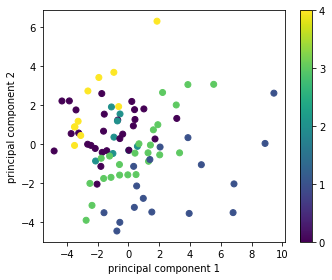

In [87]:
plt.figure(figsize=(5, 4))
plt.scatter(x = finalDf['principal component 1'], y = finalDf['principal component 2'], c=finalDf['Labels'])
plt.colorbar(ticks = [0, 1, 2, 3, 4, 5])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.tight_layout()
plt.show()

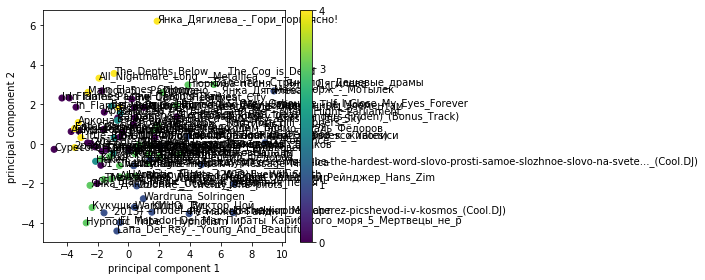

In [33]:
#Just for fun - with song names :)
plt.figure(figsize=(5, 4))
plt.scatter(x = finalDf['principal component 1'], y = finalDf['principal component 2'], c=finalDf['Labels'])
plt.colorbar(ticks = [0, 1, 2, 3, 4, 5])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.tight_layout()
words = fileList
for i, word in enumerate(words):
    plt.annotate(word, xy=(principalComponents[i, 0], principalComponents[i, 1]))
plt.show()

In [302]:
df.loc[df['Labels'] == 1]

,tempo,chroma_stft,spectral_centroid,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,Labels,File Names
5,1237.944638,2335.257942,0.052693,-196.621674,124.643456,0.990389,30.377956,17.811361,2.602557,-4.332482,...,-10.741782,-7.348182,-8.409290,-5.616458,-6.953509,-3.513726,-12.562947,-3.605808,1,Apocalyptica____Metallica
7,1381.912209,2723.512199,0.061282,-106.855164,142.151413,-7.359771,27.644417,-0.963320,3.909742,-7.707768,...,-0.202528,2.771936,-2.521173,5.160480,-3.525483,0.866322,-1.462385,-0.624999,1,Wardruna_Tyr
11,1729.290311,3492.856122,0.074761,-134.198303,114.126930,-7.035294,31.488541,13.724642,6.540407,-2.611243,...,-2.307754,1.401655,-5.320429,-1.426449,-8.742504,-0.973397,-3.362407,1.725279,1,Wardruna_IngwaR
14,1756.057873,3578.971992,0.072912,-104.251572,116.728851,-3.445933,22.750420,3.714384,5.563528,2.703874,...,-1.767864,1.668693,-3.322755,0.284363,-5.618402,2.443580,-2.505587,2.754094,1,Chlorine___twenty_one_pilots
17,1668.802631,3594.376083,0.063534,-79.378510,119.160057,-10.910595,33.787067,5.620770,16.356661,0.978193,...,-8.434722,-0.919921,-5.427216,-2.652173,-9.552678,-0.265989,-5.526920,-4.091168,1,Небо_выпил___Фёдоров__Волков
19,1577.114879,3342.879288,0.061290,-143.671997,123.443985,6.512329,27.819201,5.498388,5.966733,1.692161,...,-2.094298,1.843210,1.400111,1.655310,-6.995850,1.644146,-3.124342,-0.761212,1,Wardruna_Solringen
23,1654.619421,3442.278451,0.067916,-120.983139,115.138199,-10.602617,26.422255,4.350769,9.097175,-0.157969,...,4.119651,4.817615,-0.501265,4.003328,-0.303557,2.570570,-4.165039,0.188659,1,__2013)
39,1548.160358,3163.714563,0.058504,-161.959824,141.764877,-1.819144,24.830242,30.746075,-10.064292,9.054181,...,-8.423055,7.008133,-9.678155,8.766731,-1.844525,-2.135150,1.010340,-1.549400,1,model-dlya-sborki-shekli-robert-cherez-picshev...
43,943.937459,1494.331217,0.061253,-185.054611,172.756363,-18.225136,4.079346,-8.039318,-13.460687,-17.775734,...,4.654867,2.550089,-2.875953,-5.556864,-6.627994,-5.568121,-7.678075,-3.557555,1,Ля_мажор_Моцарт
45,1197.375335,2222.936296,0.066428,-335.197876,139.836060,-21.187309,21.308905,0.995662,-5.041504,-9.983143,...,-7.913148,-5.735977,-3.665964,-1.175792,-3.277611,-1.752958,-2.750273,1.255301,1,Утренняя_песня


In [291]:
d0 = finalDf.loc[finalDf.Labels == 0]
d0

,principal component 1,principal component 2,Labels
0,-2.025071,1.701495,0
2,-1.556867,1.364567,0
4,-1.070662,1.825666,0
15,-3.585999,0.645356,0
18,-4.603616,0.338234,0
21,-3.481605,0.380244,0
22,-1.938140,3.435049,0
24,-3.271870,1.454928,0
27,-2.781306,0.677214,0
28,0.118214,2.177664,0


### PCA for sklearm clastering

In [104]:
df_sklearn = pd.concat([data, labels_birch.birch_class, labels_kmean.kmean_clast_2,
                      labels_kmean.kmean_clast_3, labels_kmean.kmean_clast_5], axis=1, sort=False)
#df_sklearn = df_sklearn.drop('song_name', axis = 1)
df_sklearn

,song_name,duration,tempo,chroma_sqt,spectral_centroid,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,birch_class,kmean_clast_2,kmean_clast_3,kmean_clast_5
0,Аркона_Сва,391.013333,135.999178,0.449870,2685.436004,5678.307582,0.123003,-4.365860,75.313835,-2.566111,...,-6.073435,3.472966,-5.916136,1.708488,-2.358503,3.727285,1,2,3,3
1,Макс_Корж_-_Оптимист,200.725986,107.666016,0.397586,2201.484865,4716.649501,0.090569,-69.859642,92.385139,-1.880520,...,-9.653233,-0.755416,-12.548205,5.469534,-4.627914,-3.848405,4,2,1,4
2,Between_the_Buried_and_Me_-_Blot,627.330884,143.554688,0.454949,2478.192190,5319.290571,0.105323,-11.728739,83.950714,-6.042708,...,-4.100192,2.993298,-6.180595,0.924561,-5.008716,-1.243854,1,2,3,4
3,05._Black_Magic_(Make_It_Better),153.888435,89.102909,0.397452,2300.233452,4942.688821,0.088846,-84.885735,90.900841,5.949732,...,0.788870,6.847250,-1.110289,6.674957,-0.483831,1.755192,1,2,1,4
4,Heavydirtysoul___Twenty_One_Pilots,234.813333,129.199219,0.432680,2874.844137,5942.136695,0.139309,-43.674690,71.813156,-4.692971,...,-5.574951,-0.954529,-3.459168,3.881291,-3.272092,3.092876,2,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,In_Flames_Colony,279.426667,103.359375,0.540980,2744.012948,5687.781598,0.123566,9.450967,68.431847,-15.645384,...,-6.631519,1.590326,-6.395686,-2.588398,-4.849587,-3.019773,1,2,3,3
82,Aloe_Blacc_-_I_Need_A_Dollar,243.414785,95.703125,0.430760,1977.425223,4238.755785,0.081416,-157.946228,98.082062,-3.021717,...,-0.897655,4.796501,-7.382820,4.933862,-2.236449,-0.821952,4,1,1,5
83,Не_молчи._Гришковец,209.684898,151.999081,0.427207,2025.486180,4303.893836,0.085361,-67.017937,109.598900,-3.067187,...,-3.042321,5.699632,-4.894035,0.461399,-2.055482,-0.057711,4,1,1,5
84,Зеленые_глаза._Гришковец,209.684898,103.359375,0.422780,2076.164676,4588.830260,0.081821,-56.024387,101.991943,11.754837,...,-4.699355,1.196856,-5.750229,2.900234,-3.634031,-1.238999,4,2,1,4


In [106]:
features = ['duration', 'tempo', 'chroma_sqt', 'spectral_centroid', 'rolloff' ,
            'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5',
            'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12',
            'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']
# Separating out the features
x = df_sklearn[features]

In [107]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [108]:
x

array([[ 0.09446374,  0.74037599,  0.00813927, ...,  0.24658574,
         0.41139471,  1.34758728],
       [-0.56914544, -0.48355613, -0.93895392, ...,  1.36589531,
        -0.19789845, -1.36238643],
       [ 0.91859892,  1.06675788,  0.10014863, ...,  0.0132844 ,
        -0.30013636, -0.43068725],
       ...,
       [-0.53790208,  1.43153765, -0.40238442, ..., -0.12455525,
         0.49274988, -0.00638042],
       [-0.53790208, -0.66959381, -0.48256697, ...,  0.60125658,
         0.06893996, -0.42895051],
       [ 0.36769035, -0.06074322,  0.5789675 , ..., -0.61107722,
         0.90195376, -0.70399254]])

In [109]:
pca = PCA(n_components=2)

In [116]:
pca.explained_variance_ratio_

array([0.32858018, 0.16159281])

In [113]:
principalComponents = pca.fit_transform(x)

In [123]:
principalComponents

array([[-1.75632047e+00,  1.44756413e+00],
       [ 2.23612366e+00,  8.38314630e-01],
       [-1.30556558e+00,  1.11904205e+00],
       [-2.46561858e+00, -1.94678922e+00],
       [-7.70779599e-01,  1.51355065e+00],
       [ 5.27043972e+00, -8.93921416e-01],
       [ 9.70744147e-01, -1.33051437e+00],
       [ 2.61964357e-02, -3.19431746e+00],
       [ 1.71131418e+00,  3.85853577e-02],
       [-1.79872341e+00, -4.01342288e-01],
       [-9.64032090e-01,  1.96215865e+00],
       [ 1.31260590e-01, -1.09223507e+00],
       [ 1.47553835e+00, -2.50473991e-01],
       [ 3.12580679e+00,  7.32748145e-01],
       [ 6.12458393e-02, -2.30791777e+00],
       [-3.94050775e+00,  7.61374000e-01],
       [-1.00041327e+00, -2.97634151e-01],
       [ 2.39370807e+00, -1.52630506e-02],
       [-4.80534056e+00,  3.47900569e-01],
       [ 7.31235317e-01, -2.73599006e+00],
       [-2.30652327e+00, -6.69973782e-01],
       [-3.56326491e+00,  1.92304203e-01],
       [-1.64006426e+00,  3.35081339e+00],
       [-1.

In [154]:
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])

Birch clastering picture

In [155]:
finalDf = pd.concat([principalDf, df_sklearn[['birch_class']]], axis = 1)
finalDf

,principal component 1,principal component 2,birch_class
0,-1.756320,1.447564,1
1,2.236124,0.838315,4
2,-1.305566,1.119042,1
3,-2.465619,-1.946789,1
4,-0.770780,1.513551,2
...,...,...,...
81,-1.133022,3.074060,1
82,-0.667878,-1.447141,4
83,1.038253,-0.856833,4
84,0.727140,-0.094817,4


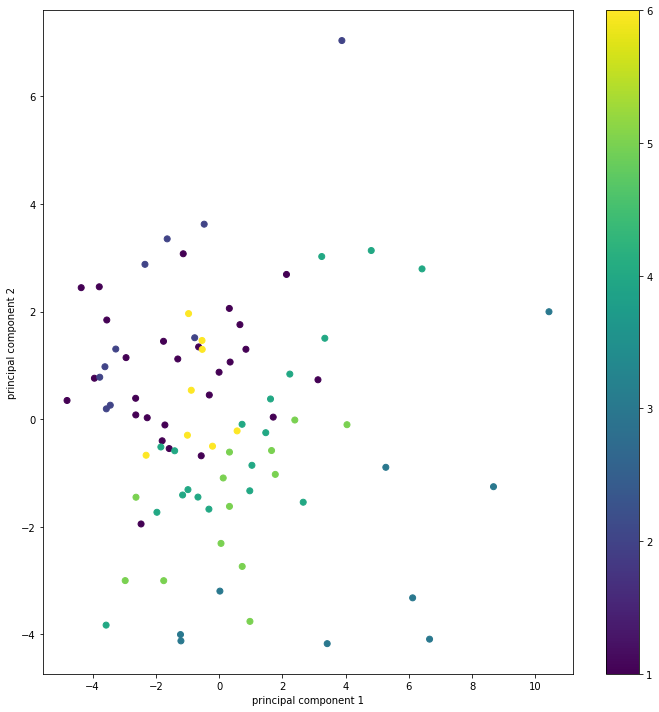

In [127]:
plt.figure(figsize=(10, 10))
plt.scatter(x = finalDf['principal component 1'], y = finalDf['principal component 2'], c=finalDf['birch_class'])
plt.colorbar(ticks = [1, 2, 3, 4, 5, 6])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.tight_layout()
plt.show()

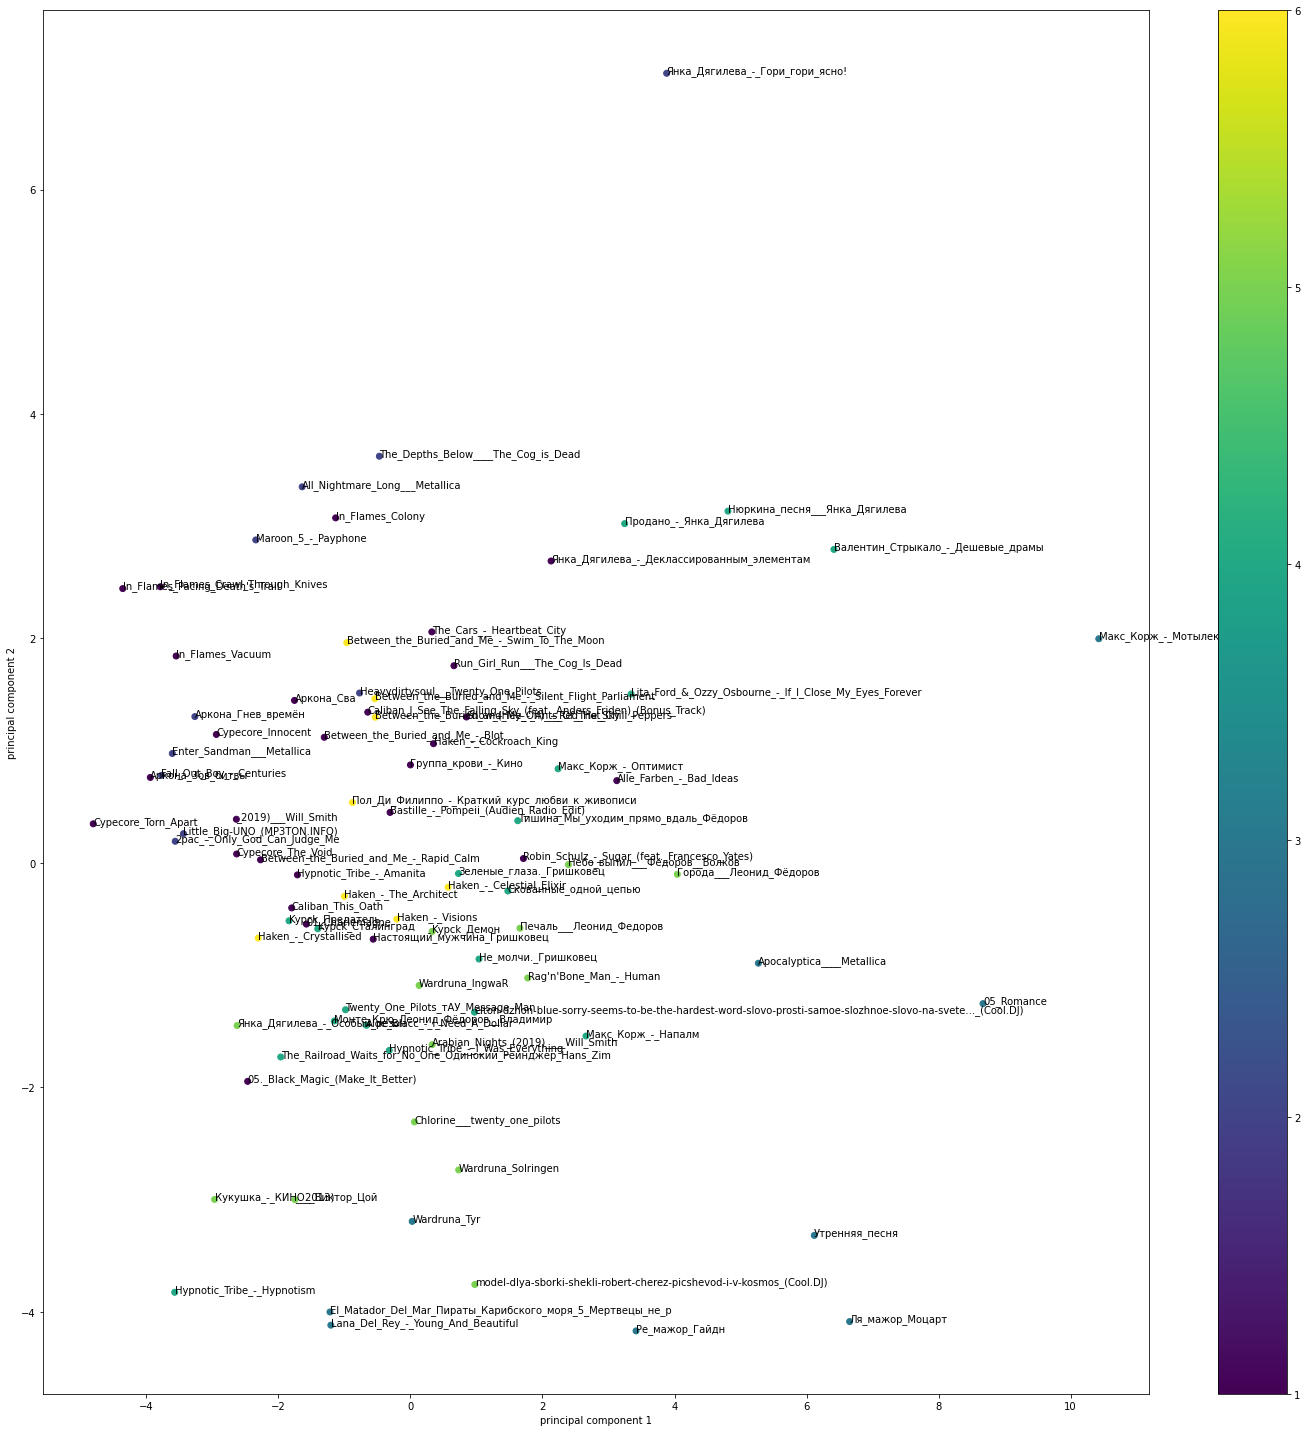

In [130]:
plt.figure(figsize=(20, 20))
plt.scatter(x = finalDf['principal component 1'], y = finalDf['principal component 2'], c=finalDf['birch_class'])
plt.colorbar(ticks = [1, 2, 3, 4, 5, 6])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.tight_layout()
words = fileList
for i, word in enumerate(words):
    plt.annotate(word, xy=(principalComponents[i, 0], principalComponents[i, 1]))
plt.show()

KMeans clastering pictures

n = 2

In [156]:
finalDf = pd.concat([principalDf, df_sklearn[['kmean_clast_2']]], axis = 1)
finalDf

,principal component 1,principal component 2,kmean_clast_2
0,-1.756320,1.447564,2
1,2.236124,0.838315,2
2,-1.305566,1.119042,2
3,-2.465619,-1.946789,2
4,-0.770780,1.513551,2
...,...,...,...
81,-1.133022,3.074060,2
82,-0.667878,-1.447141,1
83,1.038253,-0.856833,1
84,0.727140,-0.094817,2


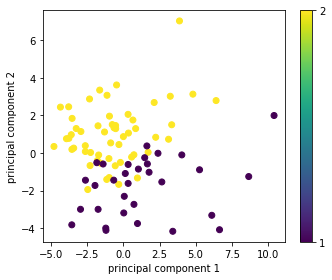

In [157]:
plt.figure(figsize=(5, 4))
plt.scatter(x = finalDf['principal component 1'], y = finalDf['principal component 2'], c=finalDf['kmean_clast_2'])
plt.colorbar(ticks = [1, 2, 3, 4, 5, 6])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.tight_layout()
plt.show()

n = 3

In [158]:
finalDf = pd.concat([principalDf, df_sklearn[['kmean_clast_3']]], axis = 1)
finalDf

,principal component 1,principal component 2,kmean_clast_3
0,-1.756320,1.447564,3
1,2.236124,0.838315,1
2,-1.305566,1.119042,3
3,-2.465619,-1.946789,1
4,-0.770780,1.513551,3
...,...,...,...
81,-1.133022,3.074060,3
82,-0.667878,-1.447141,1
83,1.038253,-0.856833,1
84,0.727140,-0.094817,1


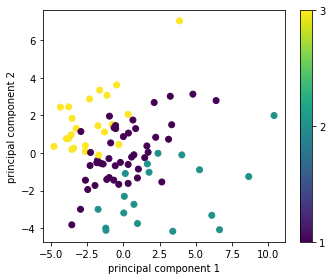

In [159]:
plt.figure(figsize=(5, 4))
plt.scatter(x = finalDf['principal component 1'], y = finalDf['principal component 2'], c=finalDf['kmean_clast_3'])
plt.colorbar(ticks = [1, 2, 3, 4, 5, 6])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.tight_layout()
plt.show()

n = 5

In [160]:
finalDf = pd.concat([principalDf, df_sklearn[['kmean_clast_5']]], axis = 1)
finalDf

,principal component 1,principal component 2,kmean_clast_5
0,-1.756320,1.447564,3
1,2.236124,0.838315,4
2,-1.305566,1.119042,4
3,-2.465619,-1.946789,4
4,-0.770780,1.513551,3
...,...,...,...
81,-1.133022,3.074060,3
82,-0.667878,-1.447141,5
83,1.038253,-0.856833,5
84,0.727140,-0.094817,4


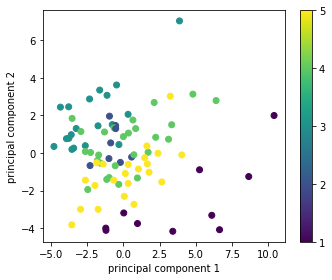

In [161]:
plt.figure(figsize=(5, 4))
plt.scatter(x = finalDf['principal component 1'], y = finalDf['principal component 2'], c=finalDf['kmean_clast_5'])
plt.colorbar(ticks = [1, 2, 3, 4, 5, 6])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.tight_layout()
plt.show()

Mini pictures

In [163]:
# for mini picture
data_1 = df_sklearn.iloc[[1,2,10,29,52,61,62,70,75,80,85],:]
data_1

,song_name,duration,tempo,chroma_sqt,spectral_centroid,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,birch_class,kmean_clast_2,kmean_clast_3,kmean_clast_5
1,Макс_Корж_-_Оптимист,200.725986,107.666016,0.397586,2201.484865,4716.649501,0.090569,-69.859642,92.385139,-1.880520,...,-9.653233,-0.755416,-12.548205,5.469534,-4.627914,-3.848405,4,2,1,4
2,Between_the_Buried_and_Me_-_Blot,627.330884,143.554688,0.454949,2478.192190,5319.290571,0.105323,-11.728739,83.950714,-6.042708,...,-4.100192,2.993298,-6.180595,0.924561,-5.008716,-1.243854,1,2,3,4
10,Between_the_Buried_and_Me_-_Swim_To_The_Moon,1073.586667,107.666016,0.510966,2455.672620,4860.713097,0.121885,-24.881981,75.259567,-14.171238,...,-7.698009,0.177121,-6.962227,-0.681943,-3.623188,0.812290,6,2,1,2
29,Between_the_Buried_and_Me_-_Silent_Flight_Parl...,909.306667,117.453835,0.489903,2390.301619,4929.067096,0.114082,1.376610,88.052216,-19.670383,...,-8.321383,0.105444,-5.287527,-0.573868,-4.410879,2.310013,6,2,1,2
52,Between_the_Buried_and_Me_-_Ants_Of_The_Sky,790.560000,123.046875,0.525879,2323.219179,4861.669735,0.107025,-15.596541,89.486382,-3.846519,...,-6.482891,1.507273,-4.058052,-2.051481,-4.542106,-0.195342,6,2,1,2
61,Kypck_Сталинград,311.933333,95.703125,0.486242,2010.441210,4182.948129,0.096877,-39.201504,107.726593,-16.598225,...,-2.417555,1.588065,-5.360435,-0.244244,-0.453900,0.067243,4,1,1,5
62,Kypck_Предатель,339.000000,80.749512,0.490239,2073.554181,4307.494579,0.091866,-35.806961,103.141212,-13.683236,...,-2.544825,1.109472,-5.711698,0.594839,-0.678285,-0.769514,4,1,1,5
70,Макс_Корж_-_Напалм,140.225306,92.285156,0.400566,2059.206623,4199.593154,0.094763,-128.953552,100.859306,-14.559817,...,-2.954531,7.325065,-5.052562,3.206751,-3.041600,4.052869,4,1,1,5
75,Макс_Корж_-_Мотылек,179.069388,161.499023,0.393806,1437.436441,2839.748402,0.066571,-70.456421,139.463440,-37.042004,...,-18.410568,-9.298686,-15.654343,-7.689228,-12.459691,-9.755809,3,1,2,1
80,Between_the_Buried_and_Me_-_Rapid_Calm,479.600000,112.347147,0.473962,2431.266405,5161.308626,0.110546,-44.990318,85.276382,-7.259348,...,-1.875464,3.338052,-3.900680,2.370283,-3.081362,2.056493,1,2,1,4


In [169]:
finalDf = pd.concat([principalDf, df_sklearn[['kmean_clast_5', 'song_name']]], axis = 1)
finalDf_mini = finalDf.iloc[[1,2,10,29,52,61,62,70,75,80,85],:]
finalDf_mini

,principal component 1,principal component 2,kmean_clast_5,song_name
1,2.236124,0.838315,4,Макс_Корж_-_Оптимист
2,-1.305566,1.119042,4,Between_the_Buried_and_Me_-_Blot
10,-0.964032,1.962159,2,Between_the_Buried_and_Me_-_Swim_To_The_Moon
29,-0.538997,1.462690,2,Between_the_Buried_and_Me_-_Silent_Flight_Parl...
52,-0.532447,1.297673,2,Between_the_Buried_and_Me_-_Ants_Of_The_Sky
61,-1.403770,-0.586908,5,Kypck_Сталинград
62,-1.839835,-0.516298,5,Kypck_Предатель
70,2.659416,-1.542781,5,Макс_Корж_-_Напалм
75,10.427328,1.997020,1,Макс_Корж_-_Мотылек
80,-2.271164,0.027160,4,Between_the_Buried_and_Me_-_Rapid_Calm


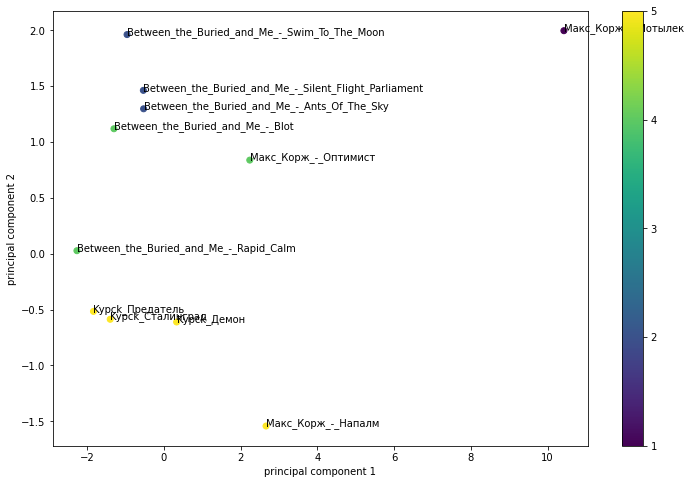

In [181]:
plt.figure(figsize=(12, 8))
plt.scatter(x = finalDf_mini['principal component 1'], y = finalDf_mini['principal component 2'], 
            c=finalDf_mini['kmean_clast_5'])
plt.colorbar(ticks = [1, 2, 3, 4, 5])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
#plt.tight_layout()
words = finalDf_mini['song_name']
for i, word in enumerate(words):
    plt.annotate(word, xy=(finalDf_mini.iloc[i, 0], finalDf_mini.iloc[i, 1]))
plt.show()